In [124]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [125]:
df = pd.DataFrame()

In [126]:
df['x1'] = [1,2,3,4,5,6,7,8,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [127]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,7,5,0
7,8,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

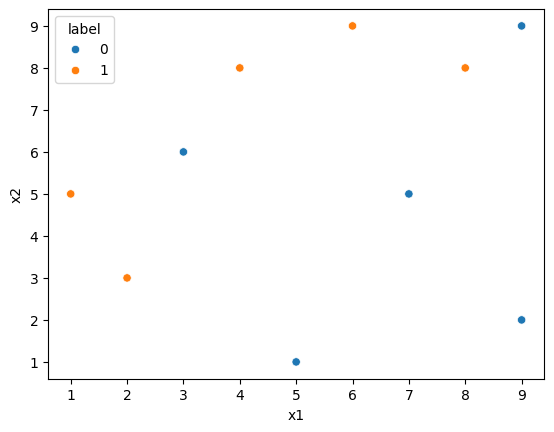

In [128]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [129]:
df['weights'] = 1/df.shape[0]

In [130]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,7,5,0,0.1
7,8,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [133]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [134]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

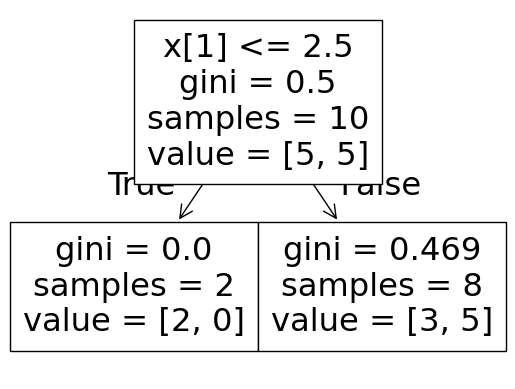

In [135]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

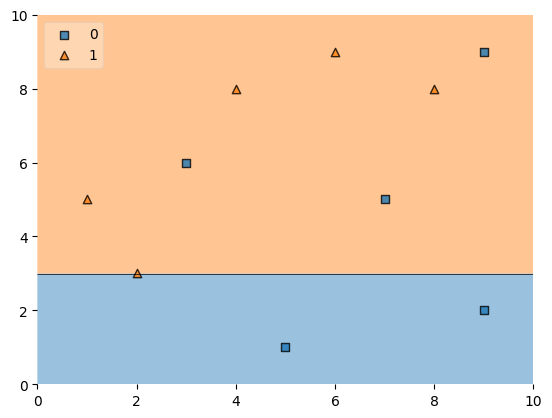

In [136]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [137]:
df['y_pred'] = dt1.predict(x)

In [138]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,7,5,0,0.1,1
7,8,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [166]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error+0.000001))

In [167]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364726352971294

In [168]:
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [169]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [170]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,7,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,8,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [171]:
df['updated_weights'].sum()

0.9165153319682015

In [172]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [173]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,7,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,8,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [174]:
df['normalized_weights'].sum()

1.0

In [175]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [176]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [177]:
df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,7,5,0,0.1,1,0.152653,0.523933,0.690492
7,8,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [201]:
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [202]:
index_values = create_new_dataset(df)
index_values

[7, 2, 2, 4, 3, 5, 9, 9, 4, 4]

In [203]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [204]:
second_df

,x1,x2,label,weights
7,8,8,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1
5,6,9,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1


In [205]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [206]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [207]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.5, '  False')]

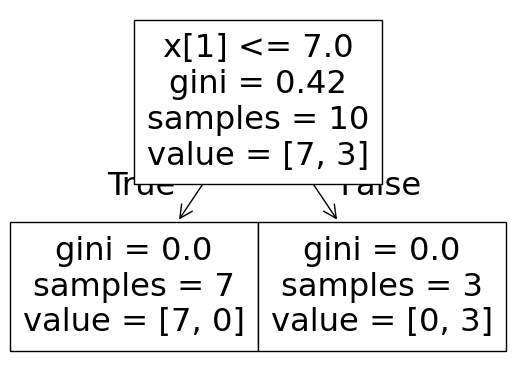

In [208]:
plot_tree(dt2)

<Axes: >

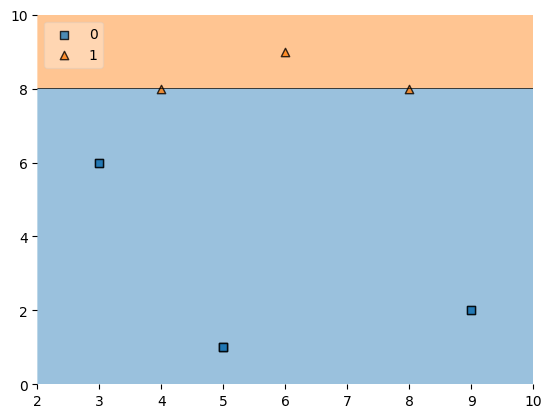

In [209]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [210]:
second_df['y_pred'] = dt2.predict(x)

In [211]:
second_df

,x1,x2,label,weights,y_pred
7,8,8,1,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
3,4,8,1,0.1,1
5,6,9,1,0.1,1
9,9,2,0,0.1,0
9,9,2,0,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,0


In [212]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986072886931095

In [213]:
def update_row_weights(row,alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [214]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [215]:
second_df

,x1,x2,label,weights,y_pred,updated_weights
7,8,8,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622


In [217]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [218]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
7,8,8,1,0.1,1,0.033622,0.1
2,3,6,0,0.1,0,0.033622,0.1
2,3,6,0,0.1,0,0.033622,0.1
4,5,1,0,0.1,0,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
9,9,2,0,0.1,0,0.033622,0.1
9,9,2,0,0.1,0,0.033622,0.1
4,5,1,0,0.1,0,0.033622,0.1
4,5,1,0,0.1,0,0.033622,0.1


In [219]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [220]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [221]:
second_df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
7,8,8,1,0.1,1,0.033622,0.0,0.1
2,3,6,0,0.1,0,0.033622,0.1,0.2
2,3,6,0,0.1,0,0.033622,0.2,0.3
4,5,1,0,0.1,0,0.033622,0.3,0.4
3,4,8,1,0.1,1,0.033622,0.4,0.5
5,6,9,1,0.1,1,0.033622,0.5,0.6
9,9,2,0,0.1,0,0.033622,0.6,0.7
9,9,2,0,0.1,0,0.033622,0.7,0.8
4,5,1,0,0.1,0,0.033622,0.8,0.9
4,5,1,0,0.1,0,0.033622,0.9,1.0


In [222]:
index_values = create_new_dataset(second_df)

In [223]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [224]:
third_df

,x1,x2,label,weights
9,9,2,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1


In [225]:
dt3 = DecisionTreeClassifier(max_depth=1)

x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.5, '  False')]

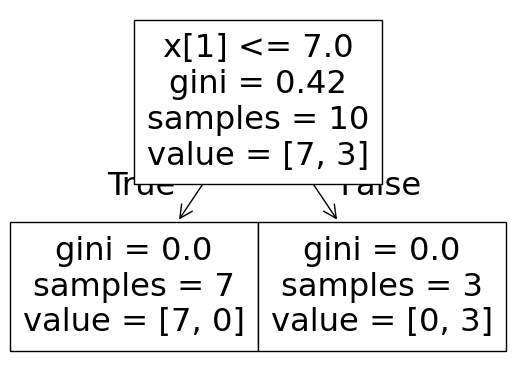

In [229]:
plot_tree(dt3)

<Axes: >

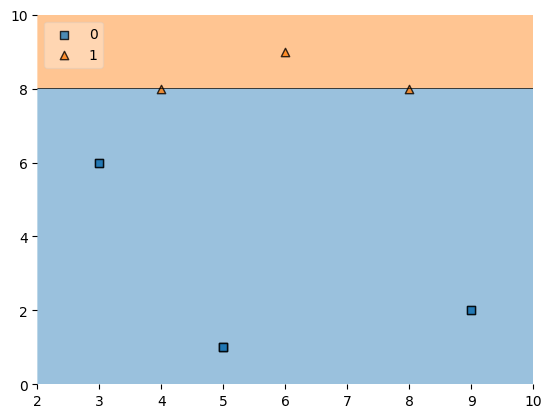

In [230]:
plot_decision_regions(x,y,clf=dt3,legend=2)

In [231]:
third_df['y_pred'] = dt3.predict(x)

In [232]:
alpha3 = calculate_model_weight(0.1)
alpha3

1.0986072886931095

In [233]:
def update_row_weights(row,alpha=1.0986):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [234]:
third_df['updated_weights'] = third_df.apply(update_row_weights,axis=1)

In [235]:
third_df['normalized_weights'] = third_df['updated_weights']/third_df['updated_weights'].sum()

In [236]:
third_df['cumsum_upper'] = np.cumsum(third_df['normalized_weights'])
third_df['cumsum_lower'] = third_df['cumsum_upper'] - third_df['normalized_weights']
third_df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
9,9,2,0,0.1,1,0.299996,0.000000,0.346151
4,5,1,0,0.1,0,0.033334,0.346151,0.384613
4,5,1,0,0.1,0,0.033334,0.384613,0.423076
4,5,1,0,0.1,0,0.033334,0.423076,0.461538
3,4,8,1,0.1,1,0.033334,0.461538,0.500000
3,4,8,1,0.1,1,0.033334,0.500000,0.538462
4,5,1,0,0.1,0,0.033334,0.538462,0.576924
3,4,8,1,0.1,0,0.299996,0.576924,0.923076
9,9,2,0,0.1,0,0.033334,0.923076,0.961538
9,9,2,0,0.1,0,0.033334,0.961538,1.000000


In [237]:
print(alpha1,alpha2,alpha3)

0.42364726352971294 1.0986072886931095 1.0986072886931095


### Prediction

In [238]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [239]:
dt2.predict(query)

array([0], dtype=int64)

In [240]:
dt3.predict(query)

array([0], dtype=int64)

In [241]:
alpha1*1 + alpha2*(-1) + alpha3*(-1)

-1.773567313856506

In [242]:
np.sign(alpha1*1 + alpha2*(-1) + alpha3*(-1))

-1.0